# Table of Contents
 <p>

In [37]:
import matplotlib.pyplot as plt
import numpy as np

from sympy import *

x = symbols('x')


def func(x):
    return exp(-x)-2*exp(-2*x)

def df(x):
    return diff(func(x), x)

print(df(x))



-exp(-x) + 4*exp(-2*x)


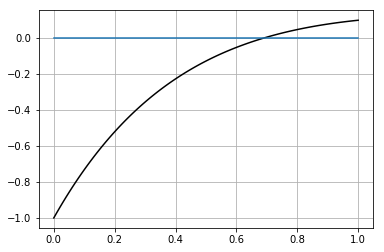

In [39]:
def func(x):
    return np.exp(-x)-2*np.exp(-2*x)

def df(x):
    return -np.exp(-x) + 4*np.exp(-2*x)

x0=0.0
x1=1.0
x = np.linspace(x0, x1, 100)
y = func(x)
plt.plot(x, y, color = 'k')
plt.plot([x0,x1],[0,0])
plt.grid()
plt.show()

In [40]:
from scipy.optimize import fsolve
x0 = fsolve(func, 0.0)[0]
pprint(x0)

0.69314718056


In [41]:
x1, x2 = 0.0, 1.0
f1, f2 = func(x1), func(x2)
print('%+15s %+15s %+15s %+15s'  % ('x1','x2','f1','f2'))
print('%-6.3f %-6.3f %-6.3f %-6.3f' % (x1,x2,f1,f2))
#x0 = 0.7034674224983916520498186018599021303429
list_bisec = [[0],[abs(x1-x0)]]
for i in range(0, 20):
    x = (x1 + x2)/2
    f = func(x)
    if (f*f1>=0.0):
        x1, f1 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x1-x0))
    else:
        x2, f2 = x, f
        list_bisec[0].append(i)
        list_bisec[1].append(abs(x2-x0))

    print('%+15.10f %+15.10f %+15.10f %+15.10f' % (x1,x2,f1,f2))

print(list_bisec)

             x1              x2              f1              f2
0.000  1.000  -1.000 0.097 
  +0.5000000000   +1.0000000000   -0.1292282226   +0.0972088747
  +0.5000000000   +0.7500000000   -0.1292282226   +0.0261062324
  +0.6250000000   +0.7500000000   -0.0377481652   +0.0261062324
  +0.6875000000   +0.7500000000   -0.0028476136   +0.0261062324
  +0.6875000000   +0.7187500000   -0.0028476136   +0.0123194385
  +0.6875000000   +0.7031250000   -0.0028476136   +0.0049148184
  +0.6875000000   +0.6953125000   -0.0028476136   +0.0010791492
  +0.6914062500   +0.6953125000   -0.0008727415   +0.0010791492
  +0.6914062500   +0.6933593750   -0.0008727415   +0.0001060635
  +0.6923828125   +0.6933593750   -0.0003826225   +0.0001060635
  +0.6928710938   +0.6933593750   -0.0001381006   +0.0001060635
  +0.6931152344   +0.6933593750   -0.0000159739   +0.0001060635
  +0.6931152344   +0.6932373047   -0.0000159739   +0.0000450560
  +0.6931152344   +0.6931762695   -0.0000159739   +0.0000145439
  +0.6931457

In [42]:
x1 = 1.0
f1 = func(x1)
list_newton = [[0],[x1]]
print('%-15.10f %+24.25f' % (x1,f1))
for i in range(0, 4):
    x1 = x1 - f1 / df(x1)
    f1 =func(x1)
    print('%-15.10f %+24.25f' % (x1,f1))
    list_newton[0].append(i)
    list_newton[1].append(abs(x1-x0))

print(list_newton)

1.0000000000    +0.0972088746982169293886500
0.4395945658    -0.1859411764694577362533323
0.6225751275    -0.0392343494594583619416994
0.6863677429    -0.0034243718517862342665126
0.6930789080    -0.0000341397924060737878449
[[0, 0, 1, 2, 3], [1.0, 0.25355261477134106, 0.070572053060396933, 0.0067794376968084435, 6.8272592720464154e-05]]


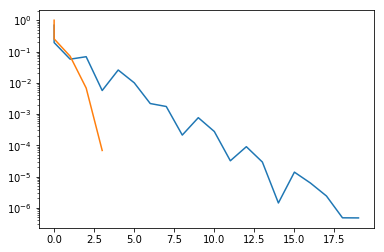

In [43]:
import matplotlib.pyplot as plt

X = list_bisec[0]
Y = list_bisec[1]
plt.plot(X, Y)

X = list_newton[0]
Y = list_newton[1]
plt.plot(X, Y)


plt.yscale("log") # y軸を対数目盛に
plt.show()
